<a href="https://colab.research.google.com/github/fakhar-iqbal/Machine_Learning_Fundamentals/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

##**The Law of Large Numbers**

In [26]:
ns = np.array([2,4,8,16,32,64,128,256,512,1024,2048,4096])


In [27]:
np.random.seed(42)

In [28]:
np.random.binomial(1,0.5)

0

In [29]:
head_counts = [np.random.binomial(n,0.5) for n in ns]
head_counts

[2, 3, 4, 6, 13, 27, 54, 136, 258, 509, 1038, 2094]

In [30]:
proportion_head = head_counts/ns

proportion_head

array([1.        , 0.75      , 0.5       , 0.375     , 0.40625   ,
       0.421875  , 0.421875  , 0.53125   , 0.50390625, 0.49707031,
       0.50683594, 0.51123047])

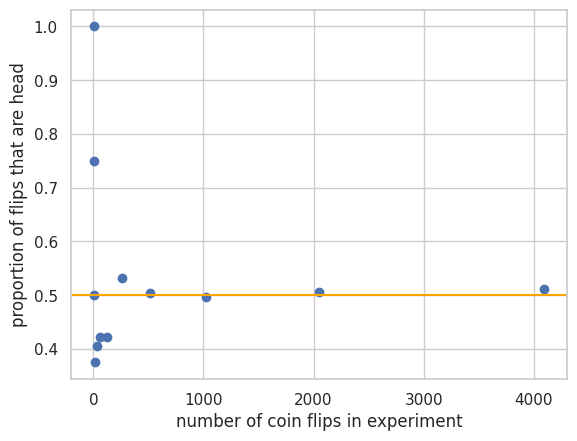

In [9]:
fig,ax = plt.subplots()

plt.xlabel('number of coin flips in experiment')
plt.ylabel('proportion of flips that are head')

plt.axhline(0.5,color='orange')
_ = ax.scatter(ns,proportion_head)

##**Statistics**

The field of statistics applies probability theory to make inference with a quantifiable degree of confidence

In [31]:
n_exp = 1000
head_count = np.random.binomial(5,0.5,n_exp)

we can plot the results of our experiments to create a probability distribution

In [32]:
heads,event_count = np.unique(head_count,return_counts=True)


In [33]:
heads

array([0, 1, 2, 3, 4, 5])

In [34]:
event_count

array([ 33, 181, 285, 313, 160,  28])

In [35]:
event_prob = event_count/n_exp

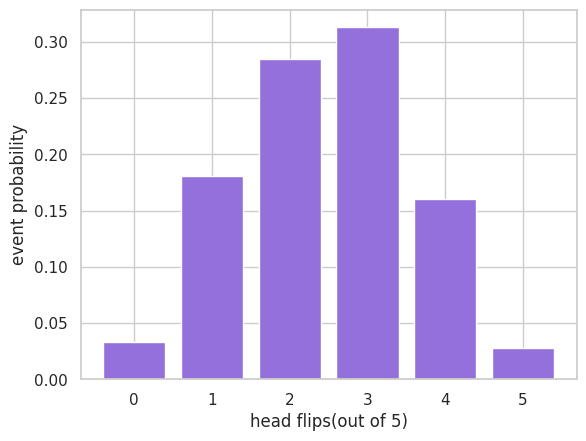

In [15]:
plt.bar(heads,event_prob,color='mediumpurple')
plt.xlabel("head flips(out of 5)")
_ = plt.ylabel('event probability')

##**Expected Value**

In [36]:
from math import factorial

In [37]:
def coinflip_prob(n,k):
  n_choose_k = factorial(n)/(factorial(k)*factorial(n-k))
  return n_choose_k/2**n

In [38]:
coinflip_prob(5,0)

0.03125

In [39]:
P = [coinflip_prob(5,x) for x in range(6)]
P

[0.03125, 0.15625, 0.3125, 0.3125, 0.15625, 0.03125]

In [40]:
E = sum([P[x]*x for x in range(6)])
E

2.5

In [41]:
coinflip_prob(1,1)

0.5

In [42]:
x = st.skewnorm.rvs(0,size=1000)  #first argument is skewness. 0 means no skew


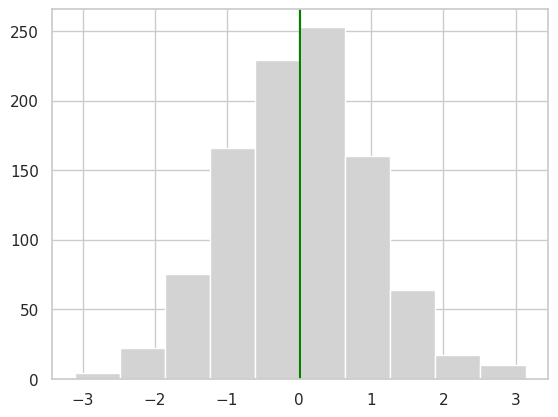

In [23]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##mode typically applies to PMFs, but this is PDFs

skewed disribution

In [43]:
x = st.skewnorm.rvs(10,size=1000)


In [44]:
x

array([ 5.53931525e-01,  1.75589950e+00,  4.56687784e-01,  1.98529279e-01,
        4.47570325e-02,  2.52043572e+00,  2.26939879e-01,  9.83204552e-01,
        1.83826154e-01,  1.71632461e+00,  7.67456010e-02,  1.02479525e+00,
        9.76019874e-01,  4.66135530e-01,  2.15079461e-01,  5.90593068e-01,
        1.64499700e+00,  3.09929934e-01,  1.69764012e+00,  6.31690521e-01,
        4.41582588e-01,  3.54591705e-01,  3.52272349e-01,  2.03592135e+00,
        3.17290793e-01,  8.67759442e-01,  5.31215395e-02,  1.38005663e+00,
        1.18823332e-01,  1.81223865e+00,  1.12367001e+00,  1.31822325e-02,
        1.06432997e+00,  3.16835972e-01,  1.71556751e+00,  9.72445560e-01,
        1.65822702e+00,  4.14224603e-01,  3.38707083e-01,  3.37908633e-01,
        2.01783787e+00,  1.65567788e+00,  2.11144470e+00,  1.89132670e-01,
        2.33029923e-01,  1.57974239e+00,  1.56700783e+00,  1.29847763e+00,
        3.75779426e-01,  1.00944489e+00,  4.77399600e-01,  8.79171460e-01,
        6.19778151e-01,  

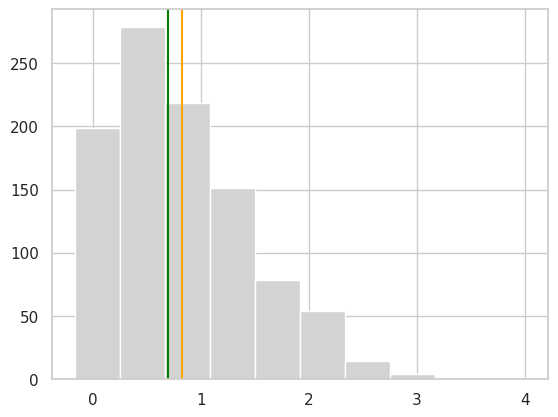

In [45]:
fig,ax = plt.subplots()
plt.axvline(x= np.mean(x),color='orange')
plt.axvline(x = np.median(x), color='green')
_ = plt.hist(x,color='lightgray')

##Quantiles

### The median, which divides a distribution in two at its midpoint, is most well known example of quantile

In [46]:
np.median(x)

0.6987365121323832

In [47]:
np.quantile(x,0.5)

0.6987365121323832

##Percentile
### Percentiles divide the distribution at any point outof one hundred. eg if we'd like to identify a threshold of top 5% of a distribution, we cut it at the 95% percentile.

In [48]:
p = np.percentile(x,[95,99])
p

array([2.06249928, 2.51830108])

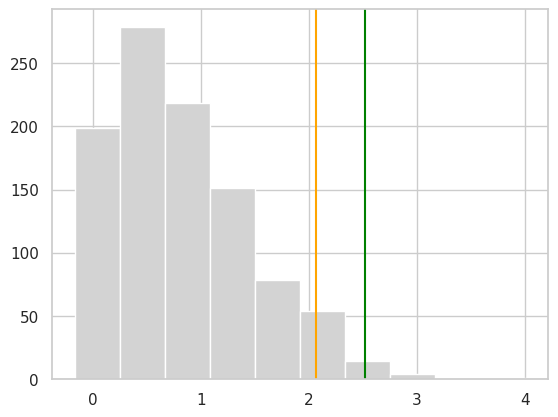

In [49]:
fig,ax = plt.subplots()
plt.axvline(x=p[0],color='orange')
plt.axvline(x=p[1],color='green')

_ = plt.hist(x,color='lightgray')

In [50]:
np.quantile(x,[.95,.99])

array([2.06249928, 2.51830108])

## Quartiles
### Quartiles as the name suggests are the quantiles that divide distribution into quarters by splitting them at 25th, median 50th, 75th percentile

In [51]:
q = np.percentile(x,[25,50,75])
q

array([0.32494046, 0.69873651, 1.19431522])

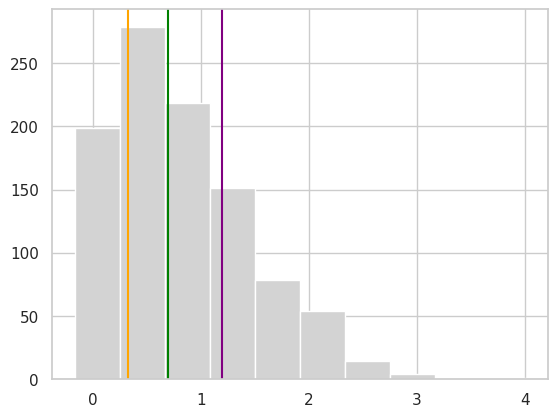

In [52]:
fig,ax = plt.subplots()
plt.axvline(q[0],color='orange')
plt.axvline(q[1],color='green')
plt.axvline(q[2], color='purple')

_ = ax.hist(x,color='lightgray')

##Deciles
### deciles divide the distribution into ten evenly-sized segments

In [53]:
d = np.percentile(x,range(10,100,10))
d

array([0.11871856, 0.24991108, 0.3992659 , 0.53290322, 0.69873651,
       0.86771624, 1.08994827, 1.30781239, 1.75782249])

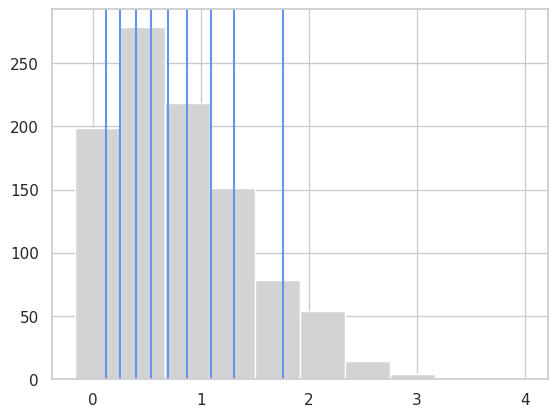

In [54]:
fig,ax = plt.subplots()
[plt.axvline(i, color='cornflowerblue') for i in d]
_ = plt.hist(x,color='lightgray')

##**The Box and Whiskers plot**

In [55]:
sns.set(style='whitegrid')

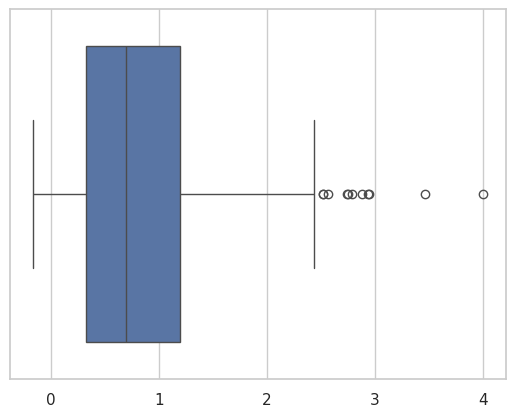

In [56]:
_ = sns.boxplot(x=x)

###Box edges and the median are determined by teh quartiles

In [57]:
q

array([0.32494046, 0.69873651, 1.19431522])

###Box edges define the inter-quartiles range IQR

In [58]:
iqr = 1.194-0.325

Whisker lengths are determined by furthest data points within 1.5 X IQR of the box edges.

### In this case, the lower whisker could stretch as far down (to the left) as:

In [59]:
0.325 - 1.5*iqr

-0.9785000000000001

### The lowest value is inside of that so whisker is plotted where that lowest value is:

In [60]:
np.min(x)

-0.17083838831568182

### The upper whisker could stretch as far up (to the right):

In [61]:
1.194  + 1.5*iqr

2.4975

In [62]:
np.max(x)

4.0064186272069575

## There are several values beyond that threshold in teh distribution. those are called outliers and are plotted individually:

In [63]:
x.sort()

In [64]:
x[-15:]

array([2.39810074, 2.40295599, 2.41430044, 2.43541111, 2.51827951,
       2.52043572, 2.56177972, 2.74024547, 2.74882884, 2.78877435,
       2.88399304, 2.93368541, 2.94293176, 3.46465001, 4.00641863])

## Useful for examining distributions on their own, box-and-whisker plot are hlpful for comparing the distribution

In [65]:
iris = sns.load_dataset('iris')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


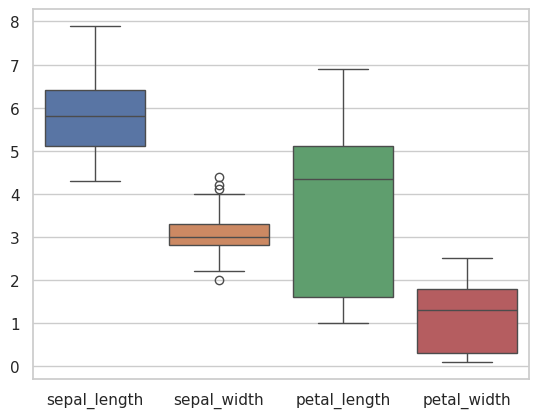

In [70]:
_ = sns.boxplot(data=iris)

In [71]:
tips = sns.load_dataset('tips')


In [72]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


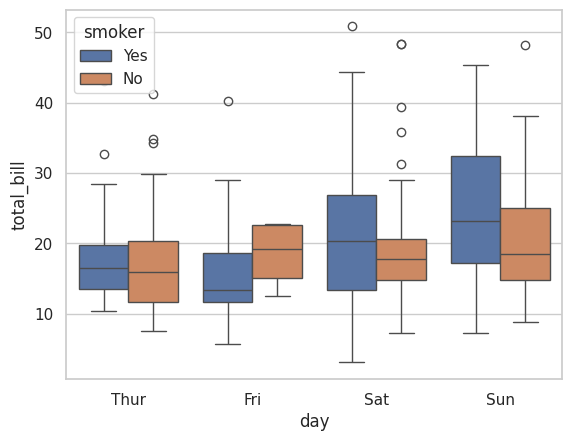

In [74]:
_ = sns.boxplot(x='day',y='total_bill',hue='smoker',data=tips)